In [1]:
# import required libraries
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

In [5]:
!pip3 install google_play_scraper

     |████████████████████████████████| 49 kB 1.2 MB/s eta 0:00:01
  Created wheel for google-play-scraper: filename=google_play_scraper-0.1.1-py3-none-any.whl size=22261 sha256=88bf3e7197cacead107db4ab282bfc6862093178016bc0199737fee78f55ae08
  Stored in directory: /Users/daciantamasan/Library/Caches/pip/wheels/62/94/f7/0b4b3c213fb6af0d611f7dd91803f9a75b9a1ca7b4284203d0
Successfully built google-play-scraper


In [6]:
from google_play_scraper import Sort, reviews, app

In [7]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [8]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [9]:
app_packages = [
  'com.anydo',
  'com.todoist',
  'com.ticktick.task',
  'com.habitrpg.android.habitica',
  'cc.forestapp',
  'com.oristats.habitbull',
  'com.levor.liferpgtasks',
  'com.habitnow',
  'com.microsoft.todos',
  'prox.lab.calclock',
  'com.gmail.jmartindev.timetune',
  'com.artfulagenda.app',
  'com.tasks.android',
  'com.appgenix.bizcal',
  'com.appxy.planner'
]

# Scraping app information

In [10]:
app_infos = []

for ap in tqdm(app_packages):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

100%|██████████| 15/15 [00:06<00:00,  2.35it/s]


In [11]:
def print_json(json_object):
    json_str = json.dumps(
        json_object,
        indent=2, 
        sort_keys=True,
        default=str
    )
    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [12]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.anydo",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "<b>\ud83c\udfc6 Editor's Choice by Google</b>\r\n\r\nAny.do is a To Do List, Calendar, Planner, Tasks & Reminders App That Helps Over 25M People Stay Organized and Get More Done.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY, WSJ).</b>\r\n\r\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists and more.\r\n\r\n\ud83d\udcc5 Organize Your Tasks & To-Do List in Seconds\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events always at hand with our calendar widget. Any.do to-do list & planner support daily calendar view, 3-day Calendar view, Weekly calendar v

In [13]:
len(app_infos)

15

In [16]:
def format_title(title):
    sep_index = title.find(':') if title.find(':') != -1 else title.find('-') 
    if sep_index != -1:
        title = title[:sep_index]
    return title[:10]

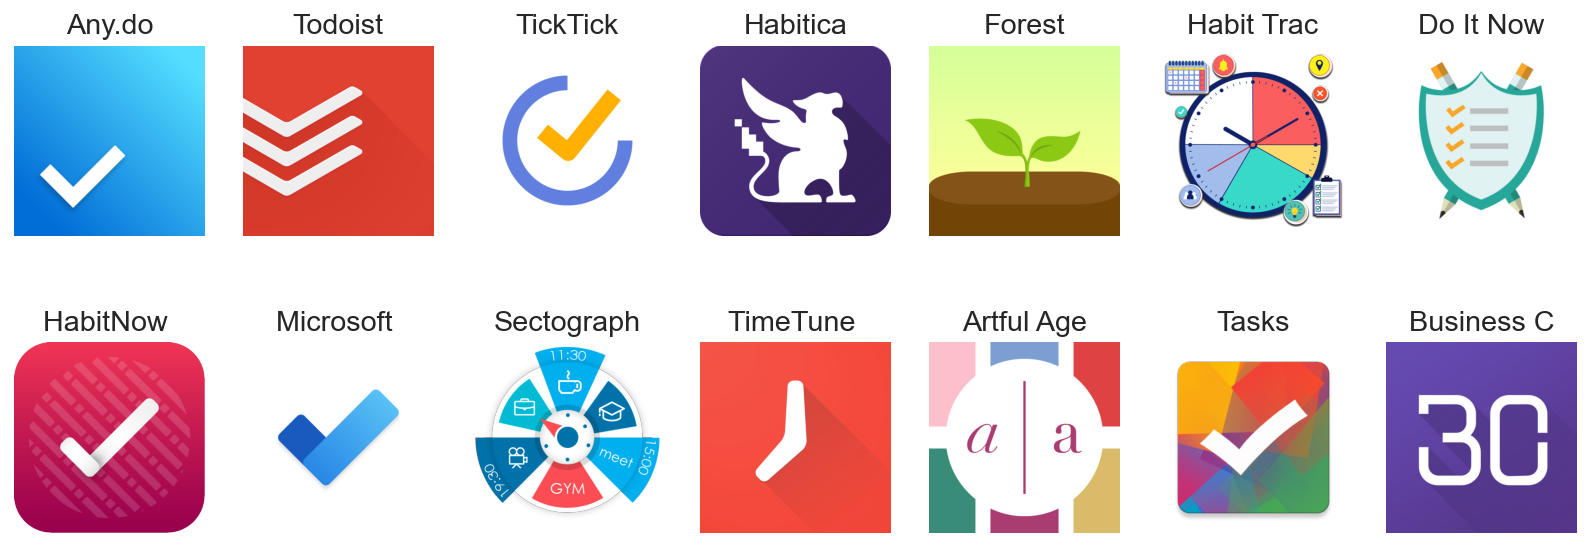

In [19]:
fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))
for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = plt.imread(ai['icon'])
    ax.imshow(img)
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

In [20]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('app.csv', index=None, header=True)

# Scraping app reviews

In [66]:
from google_play_scraper import Sort, reviews, app

app_reviews = []
for ap in tqdm(app_packages):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs = reviews_all(ap, lang='en', country='us', sort=sort_order, 
                             count=200 if score == 3 else 100, filter_score_with=score)
            for r in rvs:
                r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                r['appId'] = ap
            app_reviews.extend(rvs)

100%|██████████| 15/15 [24:42<00:00, 98.82s/it]  


In [67]:
len(app_reviews)

467702

In [68]:
app_reviews_df = pd.DataFrame(app_reviews)

In [69]:
app_reviews_df['score'].value_counts()

5    318788
4     74334
1     32078
3     26068
2     16434
Name: score, dtype: int64

In [70]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOHNHm4OfbjkxEXXa51JwZEHAaDlvfSgN0OU256...,Lex S,https://play-lh.googleusercontent.com/-FgDpDeE...,"I love this app, but I do have one major gripe...",1,124,5.2.0.23,2020-08-05 18:22:04,"We ensured that Any.do would be fairly priced,...",2020-08-10 09:41:21,most_relevant,com.anydo
1,gp:AOqpTOHB6-9UnF_GWUDr3szAVvXyvUp1OxNxBenTjog...,Colleen Wallace,https://lh3.googleusercontent.com/a-/AOh14Gjzg...,Update ruined app Last update re-formatted the...,1,60,5.4.0.6,2020-09-07 21:02:48,We are doing all we can to respond to all of o...,2020-09-08 09:58:44,most_relevant,com.anydo
2,gp:AOqpTOEujjLj56XVqumAkipImEqIAU3qTIuQjENPaOK...,Sam van Dijk,https://play-lh.googleusercontent.com/-pO3wTIb...,"Trash. Yes, it has some nice nifty features bu...",1,30,5.2.0.23,2020-07-22 00:17:25,"Premium users can edit, create and delete tags...",2020-07-23 17:57:51,most_relevant,com.anydo
3,gp:AOqpTOGCGOEcZNh7qvxq32YqKUPPFuZm-jMfFQn8HDe...,Alessandro Frul,https://lh3.googleusercontent.com/-ampdq6QXuzc...,"It doesn't have sub lists, e.g. ""child/school""...",1,10,5.5.0.8,2020-09-21 07:46:29,"Any.do is a minimalist task manager, which ref...",2020-09-23 08:21:13,most_relevant,com.anydo
4,gp:AOqpTOElISilniODwd6UBrqFngzTtDHLF-G0VLpR2_y...,Hugo Bounoua,https://lh3.googleusercontent.com/a-/AOh14GgxG...,"OMG the UI is awful, seriously you have popup ...",1,13,5.2.0.23,2020-07-22 09:23:35,The Premium ad only shows up when first openin...,2020-07-23 18:20:43,most_relevant,com.anydo


In [71]:
app_reviews_df.to_csv("reviews.csv", index=False, header=True)

In [72]:
app_reviews = []
for ap in tqdm(app_packages):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs, _ = reviews(
                ap,
                lang='en',
                country='us',
                sort=sort_order,
                count= 200 if score == 3 else 100,
                filter_score_with=score
            )
            for r in rvs:
                r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                r['appId'] = ap
            app_reviews.extend(rvs)

100%|██████████| 15/15 [01:54<00:00,  7.64s/it]


In [73]:
len(app_reviews)

16198

In [74]:
df = pd.DataFrame(app_reviews)

In [75]:
df.shape

(16198, 12)

In [76]:
df['score'].value_counts()

3    5174
5    2944
4    2844
1    2668
2    2568
Name: score, dtype: int64

In [77]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOHNHm4OfbjkxEXXa51JwZEHAaDlvfSgN0OU256...,Lex S,https://play-lh.googleusercontent.com/-FgDpDeE...,"I love this app, but I do have one major gripe...",1,124,5.2.0.23,2020-08-05 18:22:04,"We ensured that Any.do would be fairly priced,...",2020-08-10 09:41:21,most_relevant,com.anydo
1,gp:AOqpTOHB6-9UnF_GWUDr3szAVvXyvUp1OxNxBenTjog...,Colleen Wallace,https://lh3.googleusercontent.com/a-/AOh14Gjzg...,Update ruined app Last update re-formatted the...,1,61,5.4.0.6,2020-09-07 21:02:48,We are doing all we can to respond to all of o...,2020-09-08 09:58:44,most_relevant,com.anydo
2,gp:AOqpTOEujjLj56XVqumAkipImEqIAU3qTIuQjENPaOK...,Sam van Dijk,https://play-lh.googleusercontent.com/-pO3wTIb...,"Trash. Yes, it has some nice nifty features bu...",1,30,5.2.0.23,2020-07-22 00:17:25,"Premium users can edit, create and delete tags...",2020-07-23 17:57:51,most_relevant,com.anydo
3,gp:AOqpTOGCGOEcZNh7qvxq32YqKUPPFuZm-jMfFQn8HDe...,Alessandro Frul,https://lh3.googleusercontent.com/-ampdq6QXuzc...,"It doesn't have sub lists, e.g. ""child/school""...",1,10,5.5.0.8,2020-09-21 07:46:29,"Any.do is a minimalist task manager, which ref...",2020-09-23 08:21:13,most_relevant,com.anydo
4,gp:AOqpTOElISilniODwd6UBrqFngzTtDHLF-G0VLpR2_y...,Hugo Bounoua,https://lh3.googleusercontent.com/a-/AOh14GgxG...,"OMG the UI is awful, seriously you have popup ...",1,13,5.2.0.23,2020-07-22 09:23:35,The Premium ad only shows up when first openin...,2020-07-23 18:20:43,most_relevant,com.anydo


In [78]:
df.to_csv('../data/google_play_reviews/dataset.csv', index=False, header=True)